# Census Income Project

Problem Statement Description -

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



Importing required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [6]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [7]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.shape

(32560, 15)

In the given dataset we have 32560 rows and 15 columns including target columns.

In [9]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Statistical description

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#EDA -

Checking the null values in the dataset

In [13]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Workclass': 9,
 'Education': 16,
 'Marital_status': 7,
 'Occupation': 15,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Native_country': 42,
 'Income': 2}

In [18]:
df.select_dtypes('object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [19]:
col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

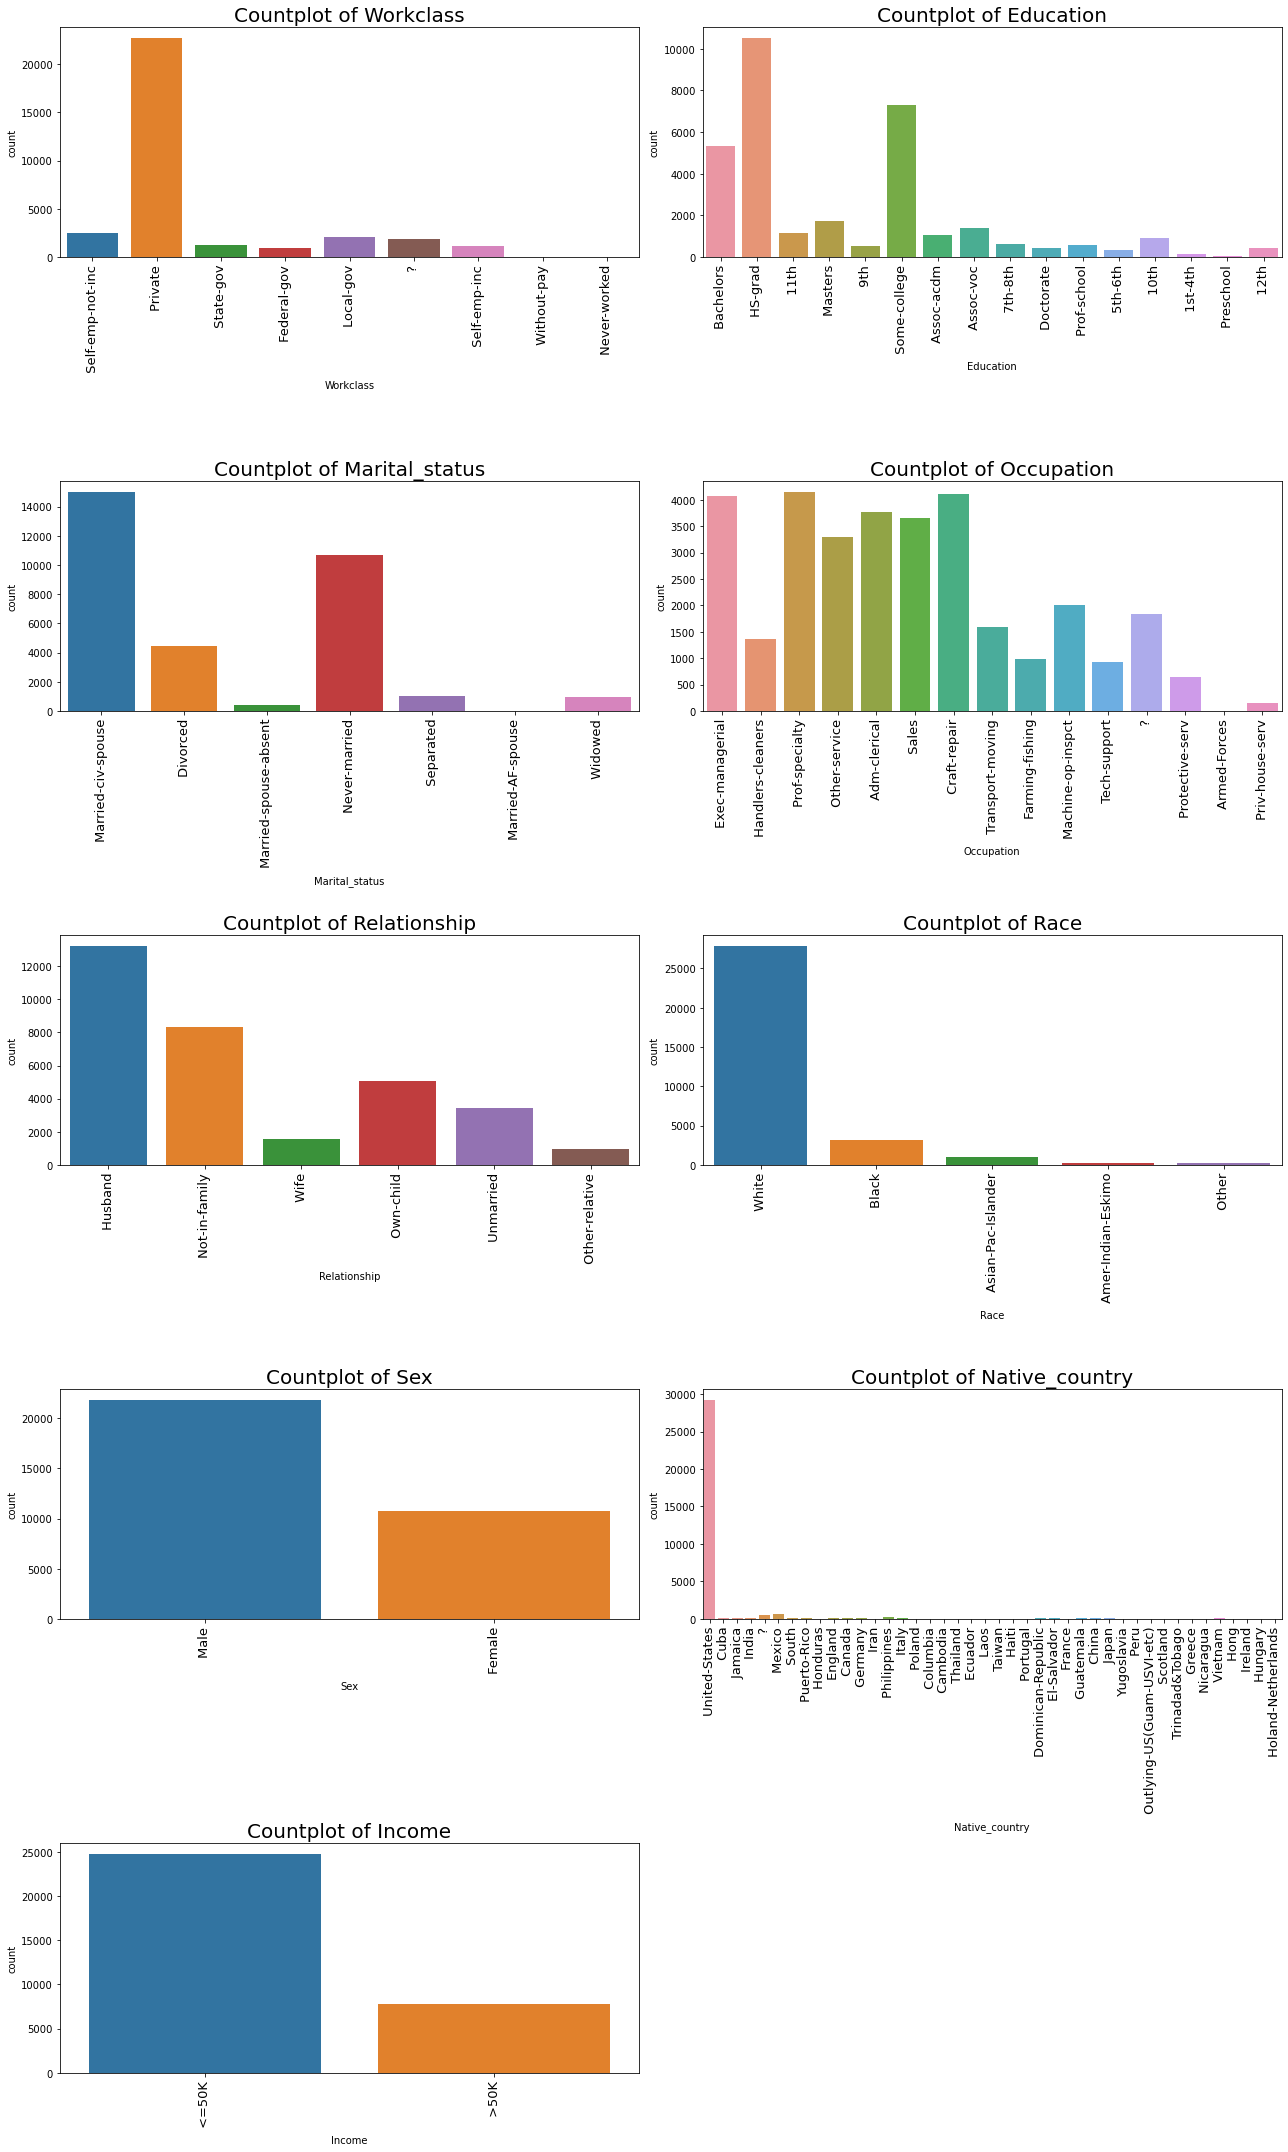

In [21]:
plt.figure(figsize=(18,30))
for i in range(len(col)):
  plt.subplot(5,2,i+1)
  sns.countplot(df[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

Obsevation -

1)From workclass Private has the highest count than others.

2)From education the HS-grad and Some-college has the highest count than others. 

3)From marital_status the Married-civ-spouse and Never-married has the highest count than others.

4)from occupation Prof-specialty, Craft-repair and Exec-managerial has the highest count than others.

5)from relationship counplot Husband it has the highest count than others.

6)from race White has the highest count than others.

7)From countplot of native_country only US has the high and good count other have very less count.

8)From sex the male count is more.

9)From income the more people are there who have income less then 50k

In [22]:
df.select_dtypes(exclude='object')

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [23]:
col1=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

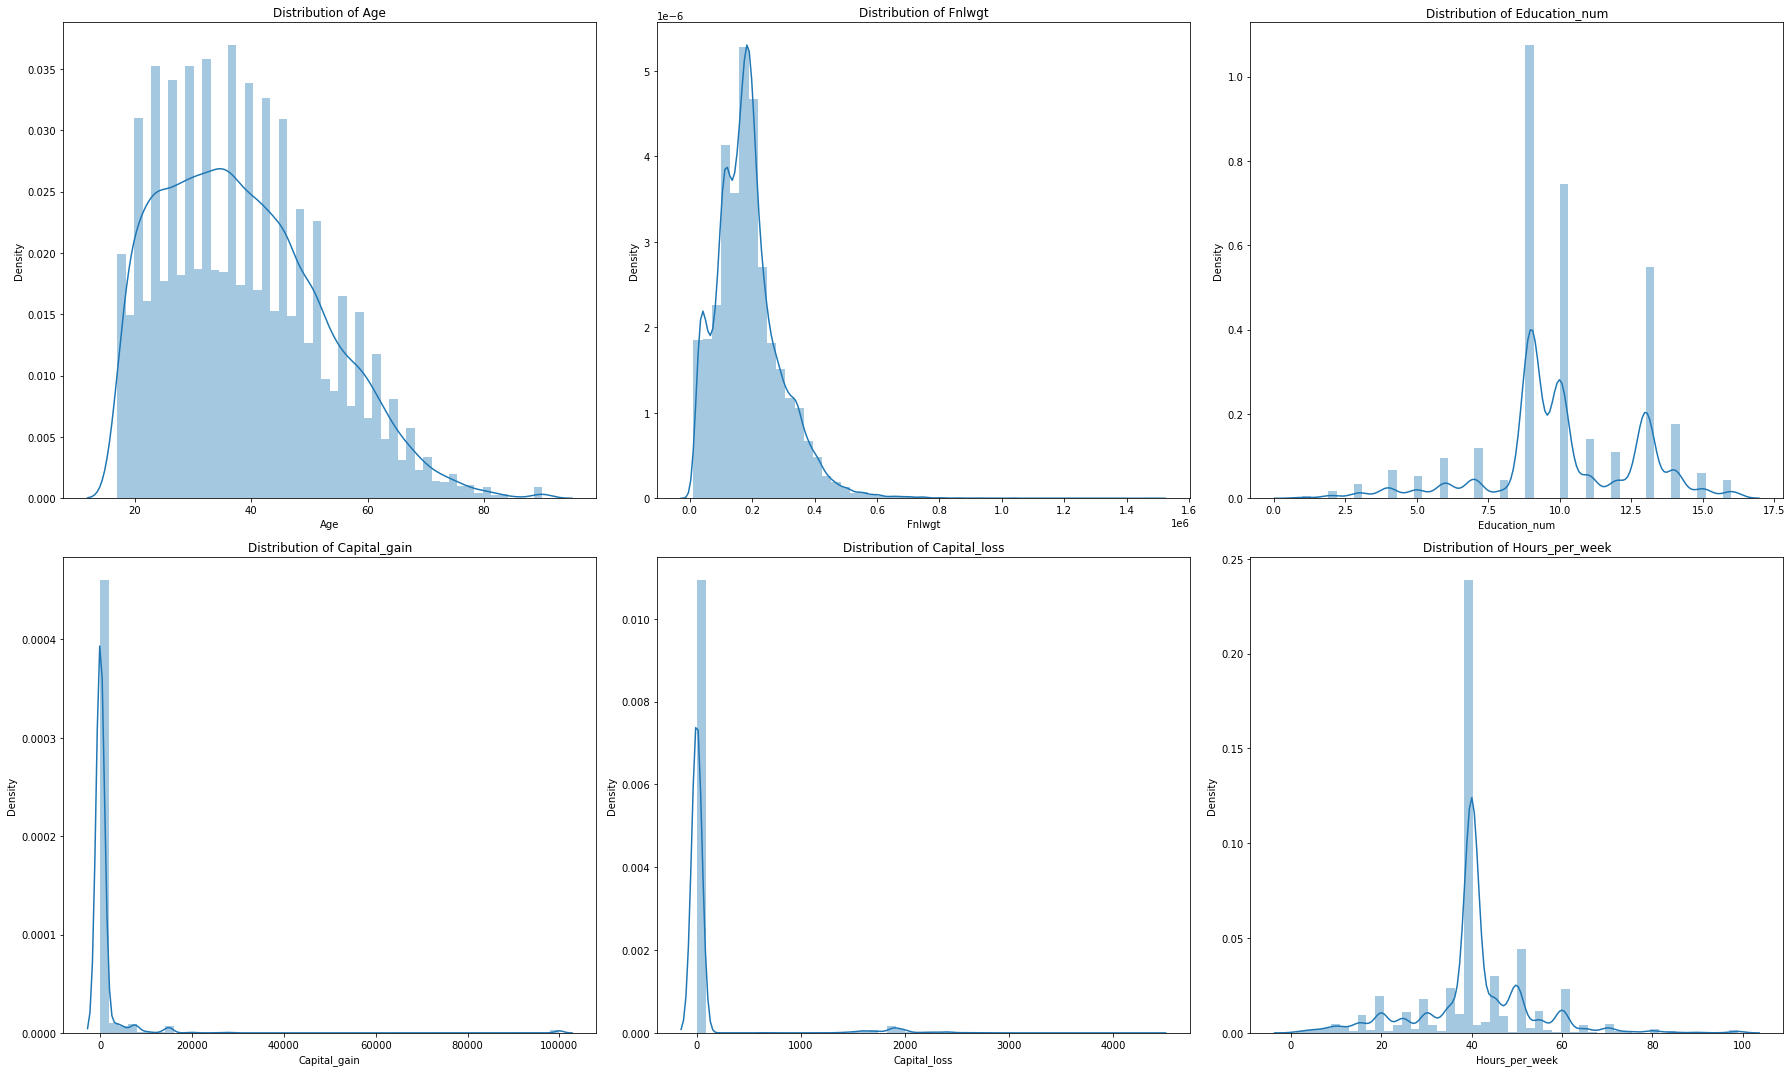

In [24]:
plt.figure(figsize=(25,15))
for i in range(len(col1)):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col1[i]])
  plt.title(f"Distribution of {col1[i]}")
  plt.tight_layout()

In [25]:
col2=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

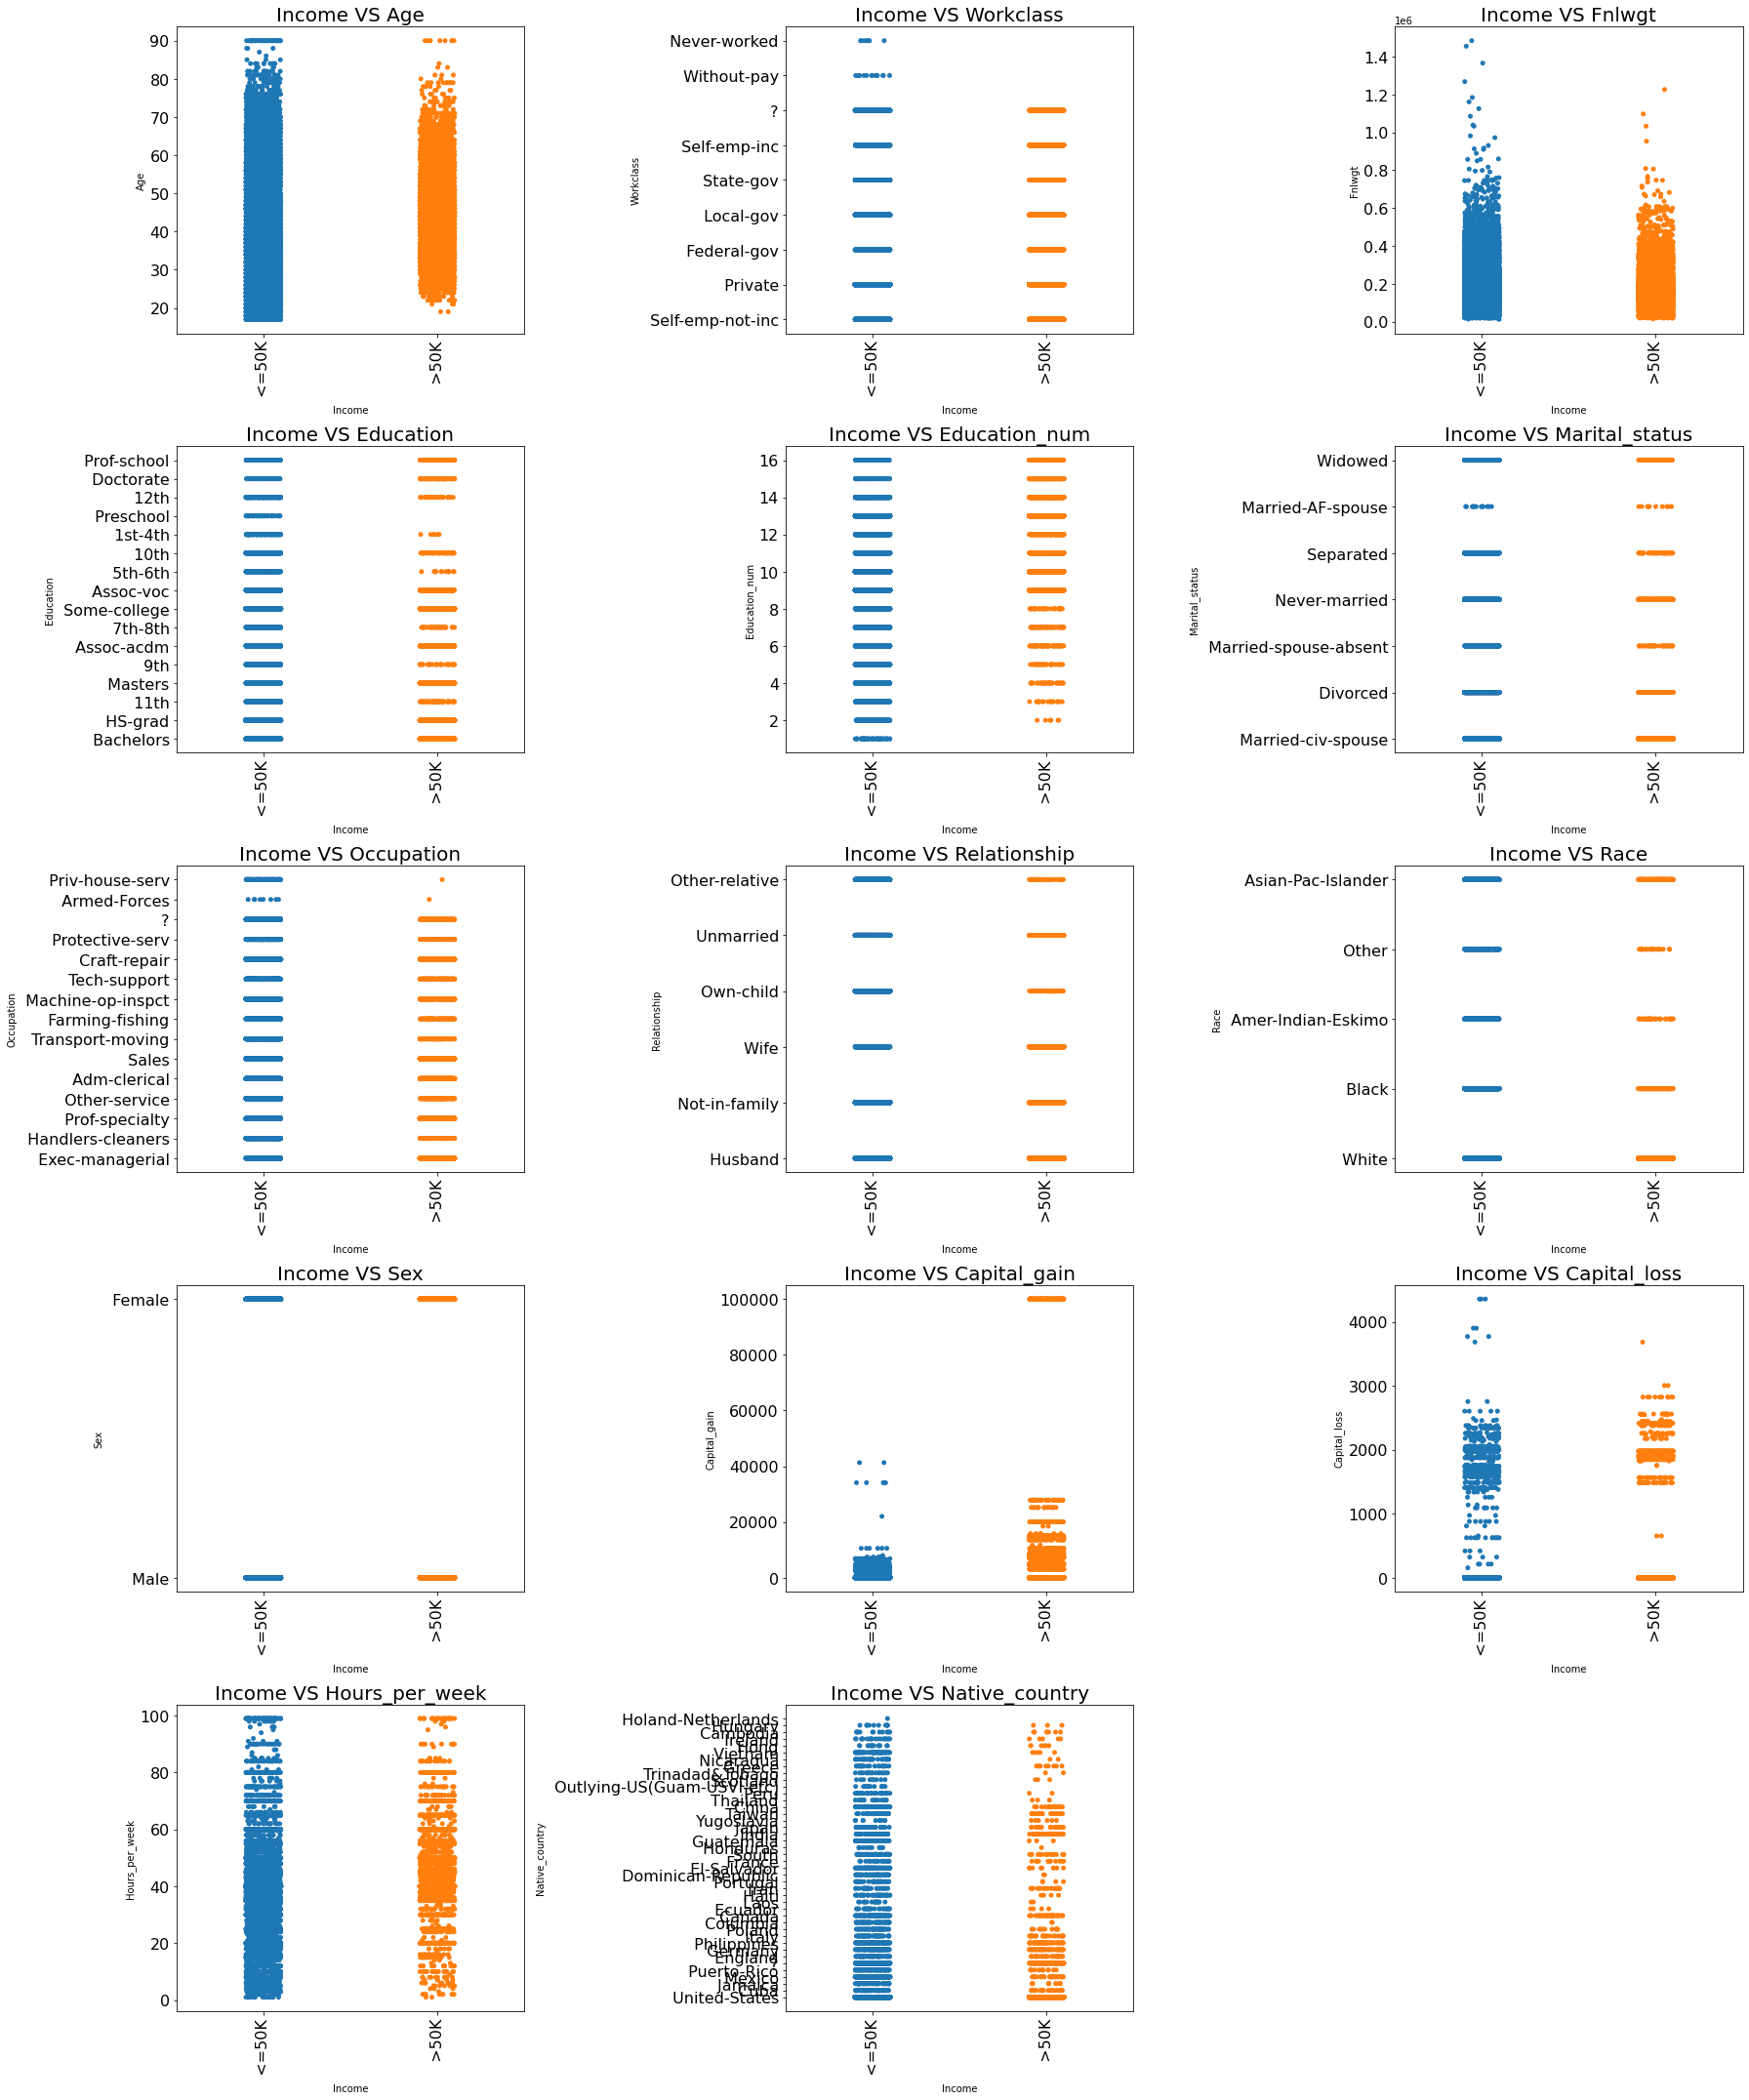

In [26]:
plt.figure(figsize=(25,30))
for i in range(len(col2)):
  plt.subplot(5,3,i+1)
  sns.stripplot(x=df['Income'],y=df[col2[i]])
  plt.title(f"Income VS {col2[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

1) From age the people from age 25 to 65 have high chances to get more than 50k.

2) From workclass except without pay and never worked other workclass have chances to earn more than 50k.

3) From education as the education increase there are more chances to earn more than 50k and also same with education_num.

4) From marital status except all married-af-spouse have chances to earn more than 50k.

5) From occupation as the occupation increase there are more chances to earn more than 50k.

6) from relationship there is no such effect of relationship on income and also same with SEX.

7) From capital gain more the capital income they have more chances to earn more than 50k.

8) From capital loss those have less capital loss then they have more income.

9) for last two plot i shall plot them again to understand them neatly and throughly.

In [42]:
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
import mlrose
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

ERROR: Could not find a version that satisfies the requirement scikit-pyplot
ERROR: No matching distribution found for scikit-pyplot


ModuleNotFoundError: No module named 'imblearn'

In [40]:
col3=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','Education_num']

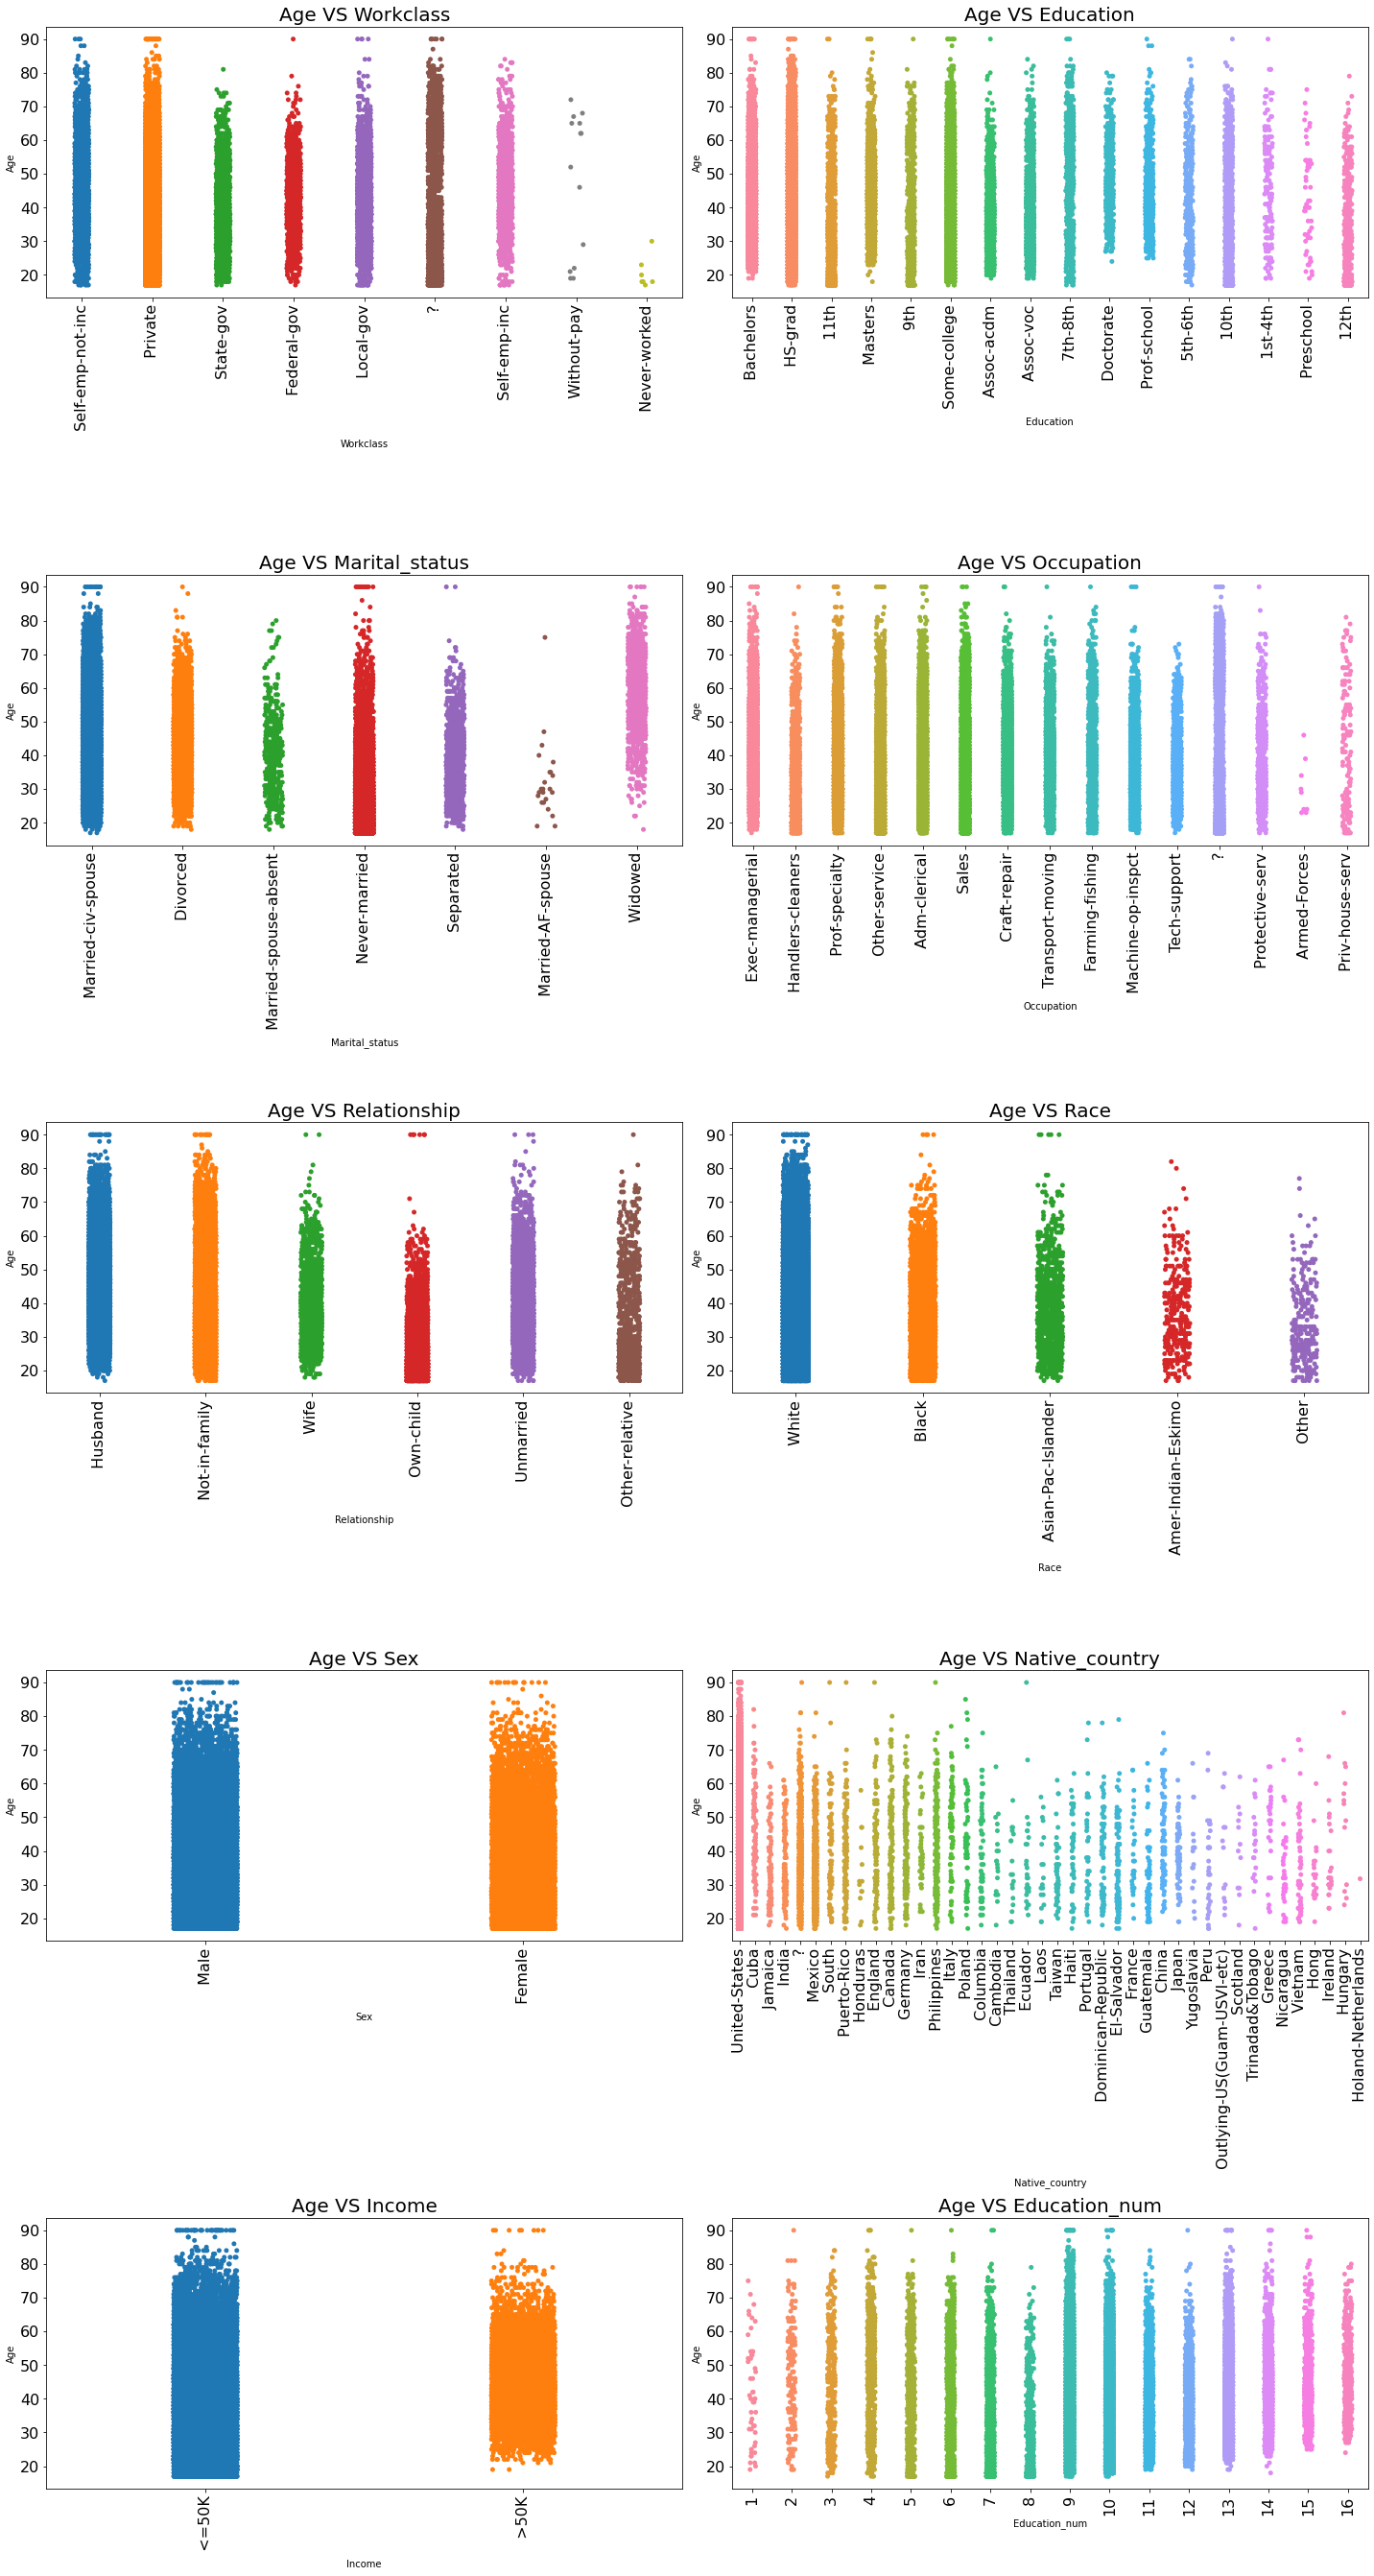

In [44]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.stripplot(y=df['Age'],x=df[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

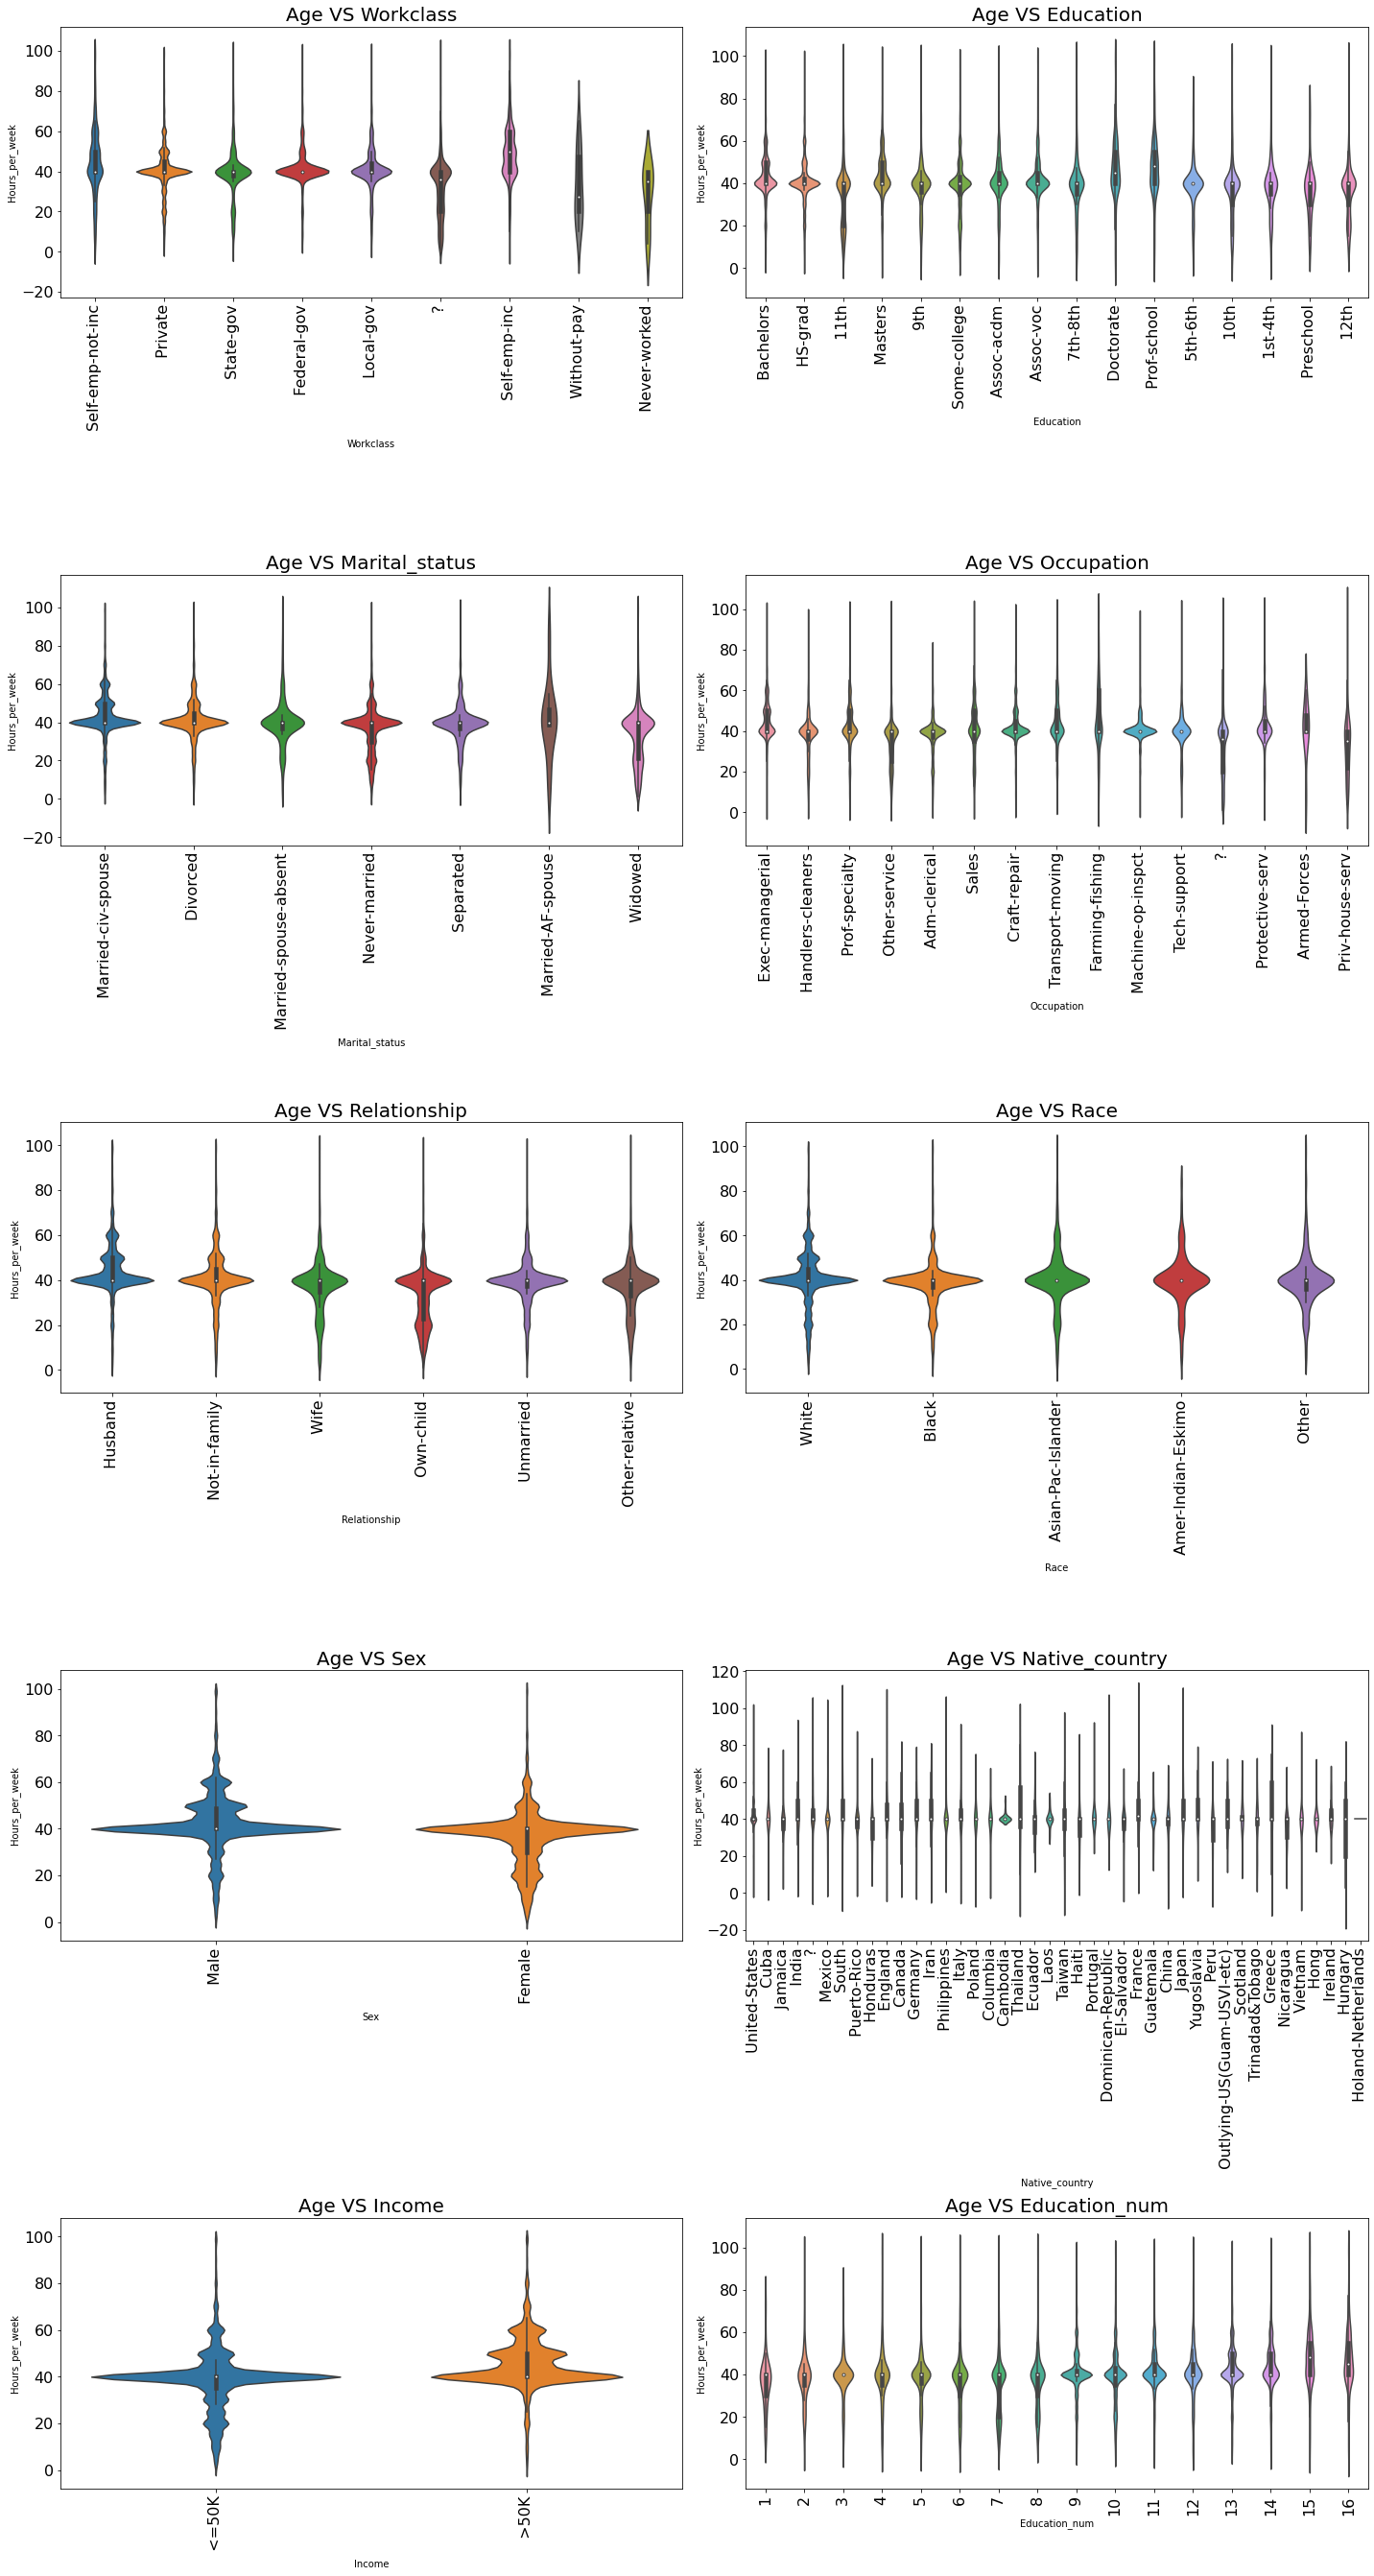

In [45]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.violinplot(y=df['Hours_per_week'],x=df[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

Data Visualization

In [46]:
df0=df.groupby(['Age',"Income"]).apply(lambda x:x['Hours_per_week'].count()).reset_index(name='Hours')

Text(0.5, 1.0, 'Income VS Work Of Hours')

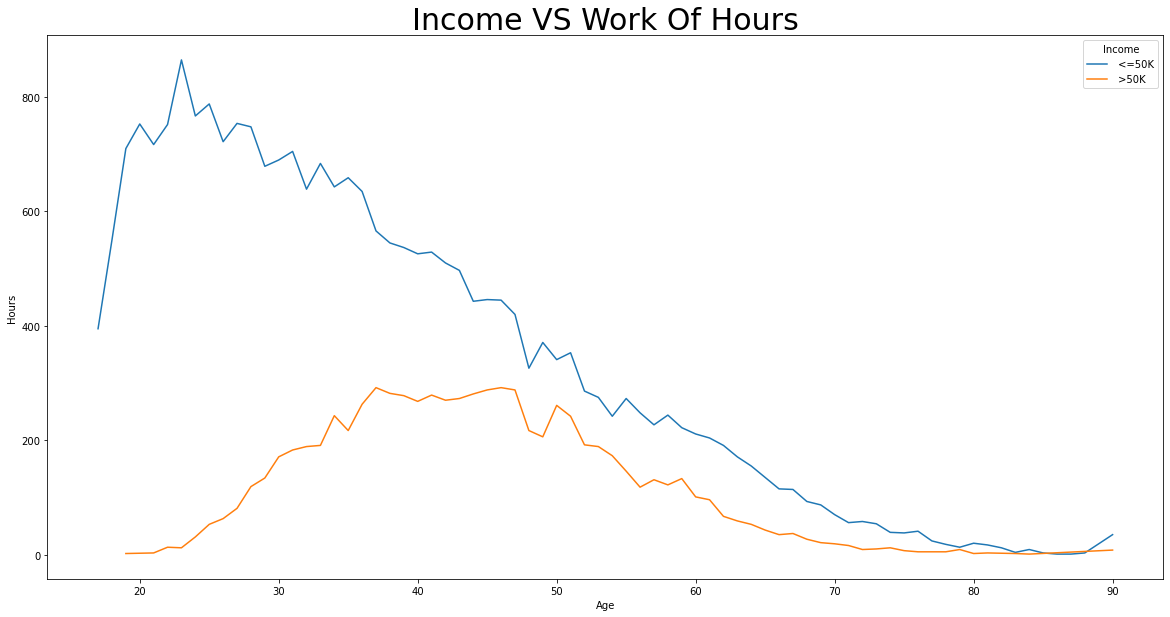

In [60]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='Hours',data=df0,hue='Income')
plt.title("Income VS Work Of Hours",fontsize=30)

Text(0.5, 1.0, 'Income Vs Age')

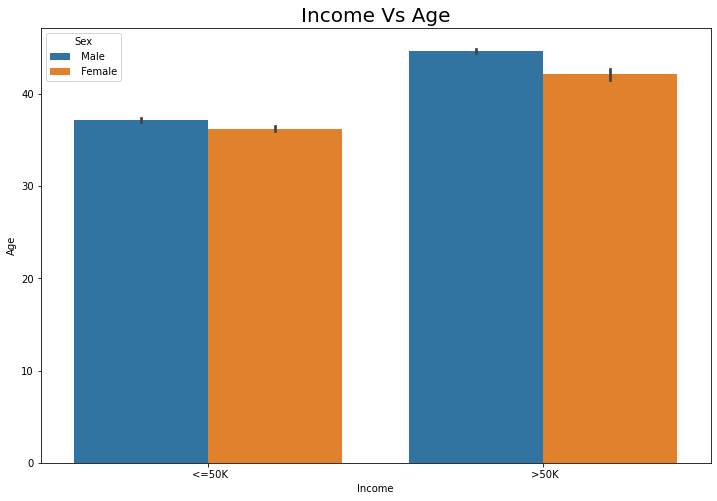

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x='Income',y='Age',data=df,hue='Sex')
plt.title("Income Vs Age",fontsize=20)

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

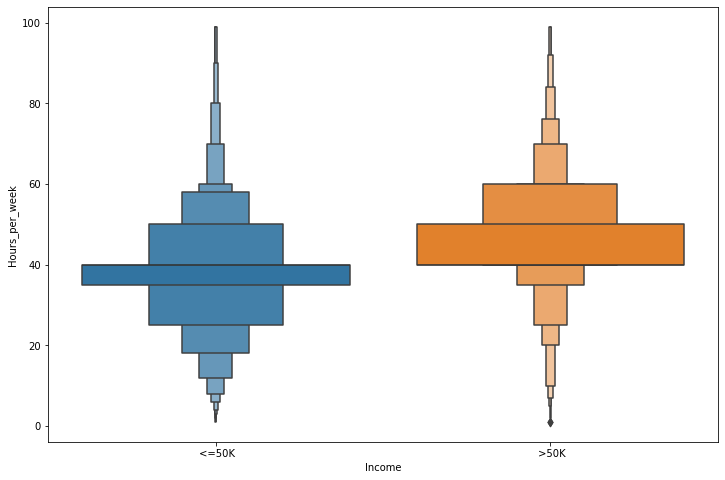

In [61]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='Income',y='Hours_per_week',data=df)

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

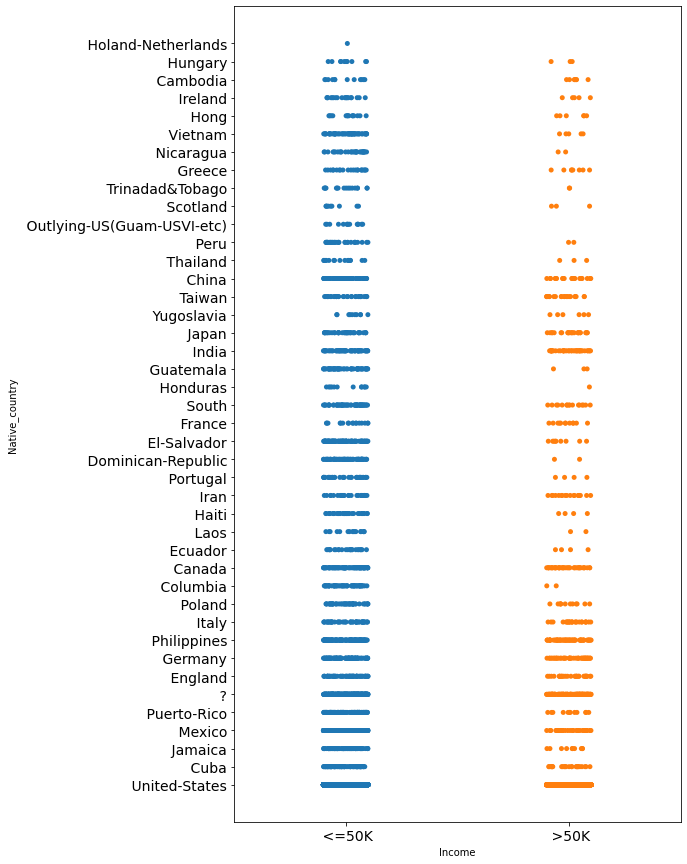

In [62]:
plt.figure(figsize=(8,15))
sns.stripplot(x='Income',y='Native_country',data=df)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

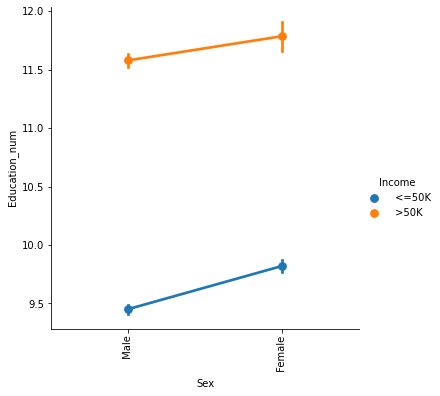

In [63]:
sns.factorplot(x='Sex',y='Education_num',data=df,hue='Income')
plt.xticks(rotation=90)

<Figure size 864x576 with 0 Axes>

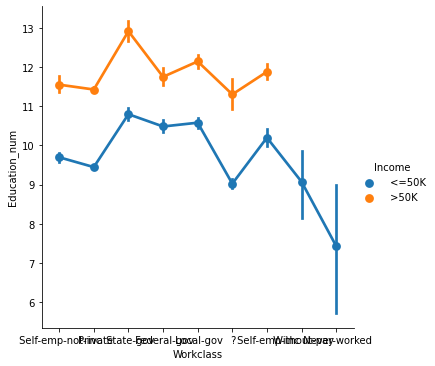

In [64]:
plt.figure(figsize=(12,8))
sns.factorplot(x='Workclass',y='Education_num',hue='Income',data=df)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

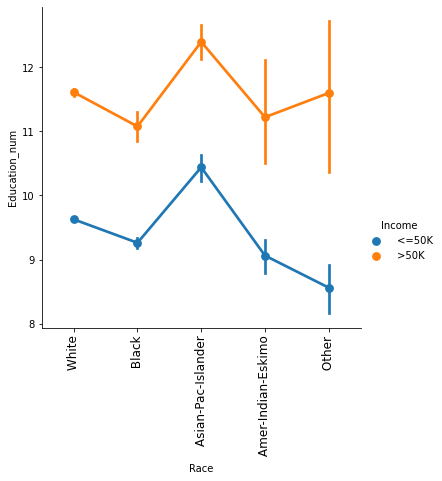

In [65]:
sns.factorplot(x='Race',y='Education_num',hue='Income',data=df)
plt.xticks(rotation=90,fontsize=12)

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

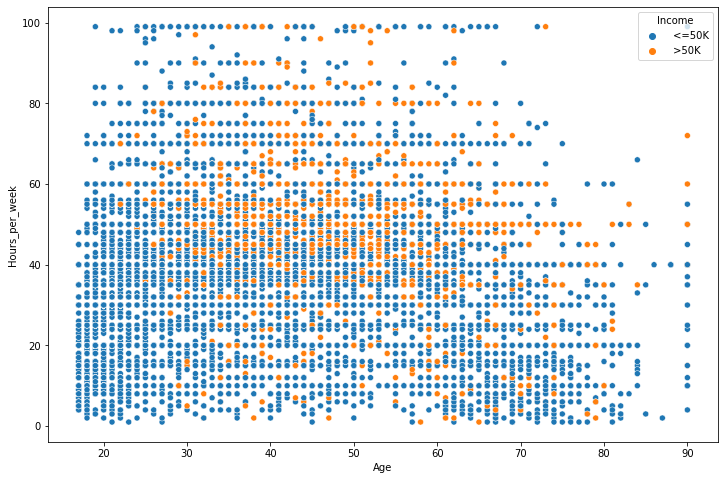

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='Hours_per_week',data=df,hue='Income')

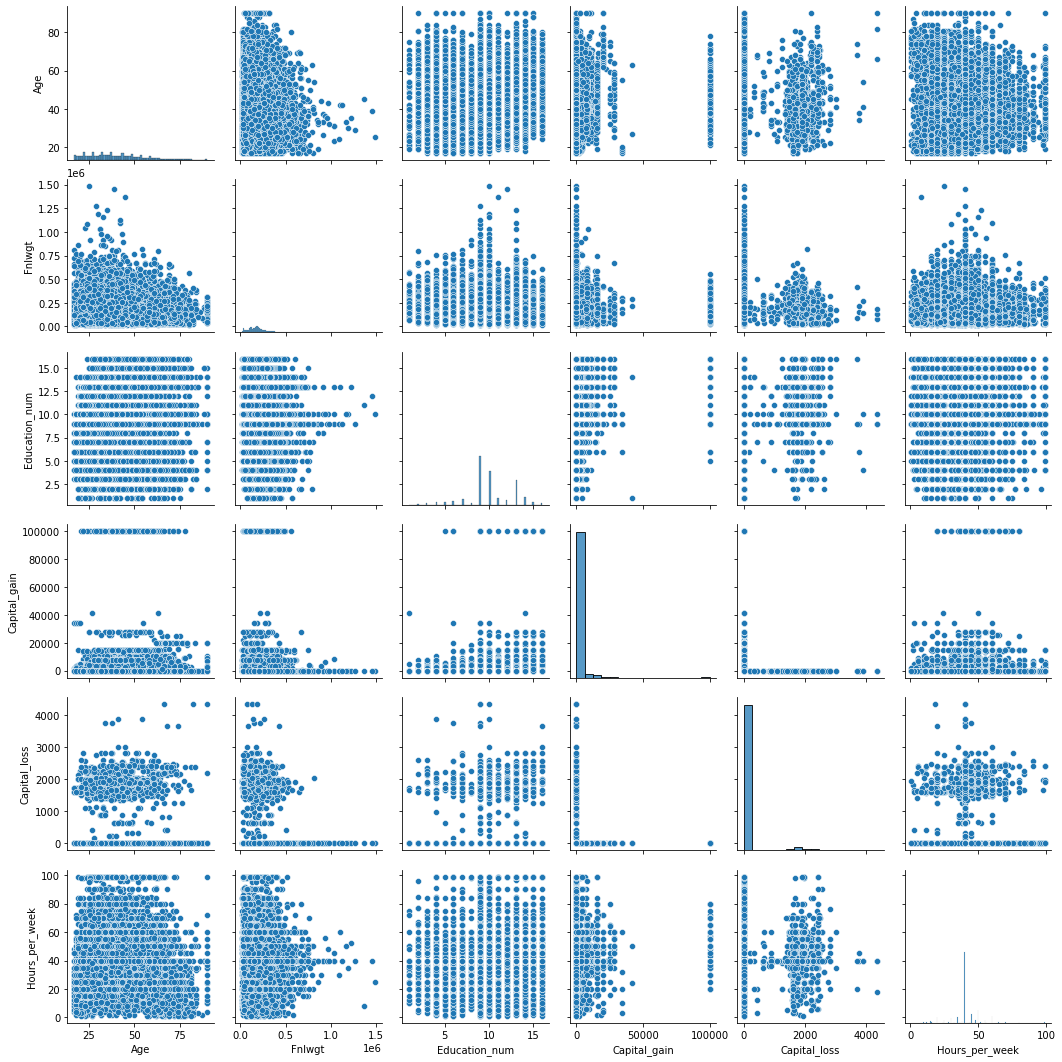

In [68]:
sns.pairplot(df)

Data cleaning 

In [70]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Workclass': 9,
 'Education': 16,
 'Marital_status': 7,
 'Occupation': 15,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Native_country': 42,
 'Income': 2}

In [71]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,power_transform

In [72]:
Oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=Oe.fit_transform(df[column])
  return df

In [73]:
df=ordinal_encoder(df,['Education','Income','Marital_status','Occupation','Race','Relationship','Sex','Workclass'])

In [74]:
def preprocessing(df):
  df=df.copy()
  le=LabelEncoder()
  df['Native_country']=le.fit_transform(df['Native_country'])
  X=df.drop('Income',axis=1)
  y=df['Income']
  return X,y

In [75]:
X,y=preprocessing(df)

In [78]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39


Checking Correlation

In [79]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.215995


<function matplotlib.pyplot.show(close=None, block=None)>

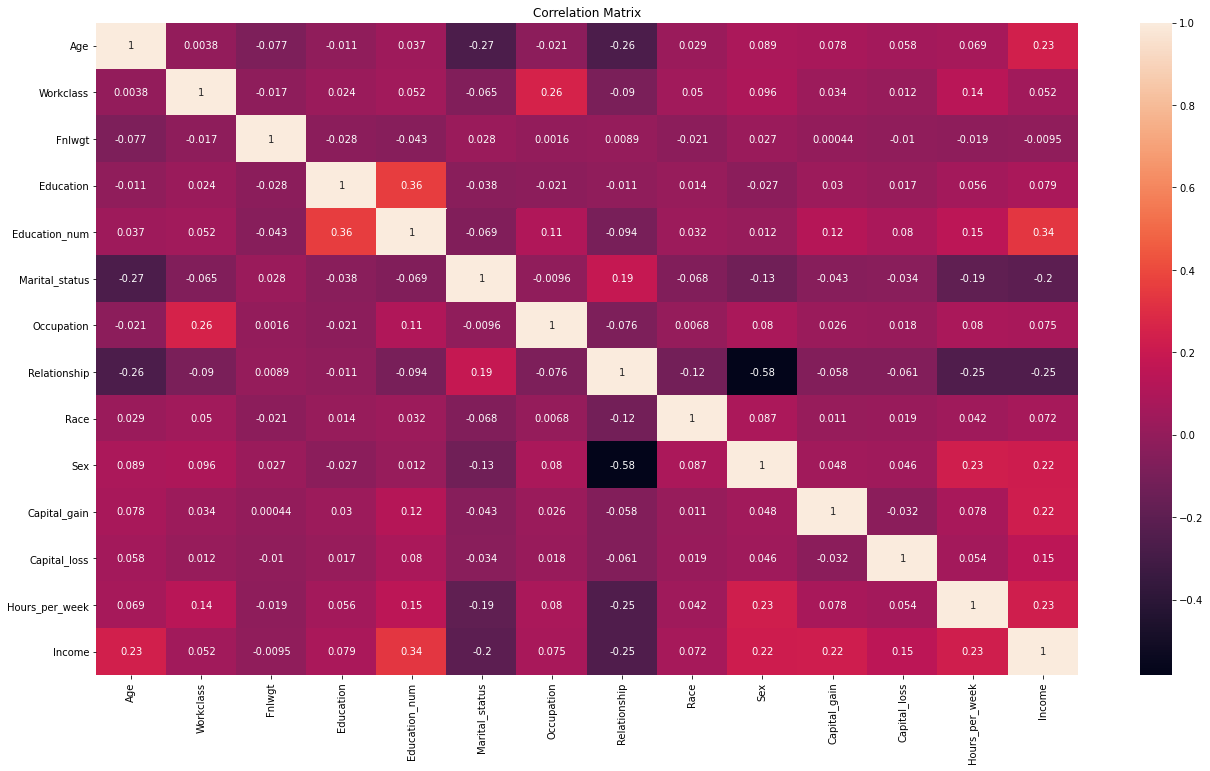

In [80]:
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show

Checking Outliers

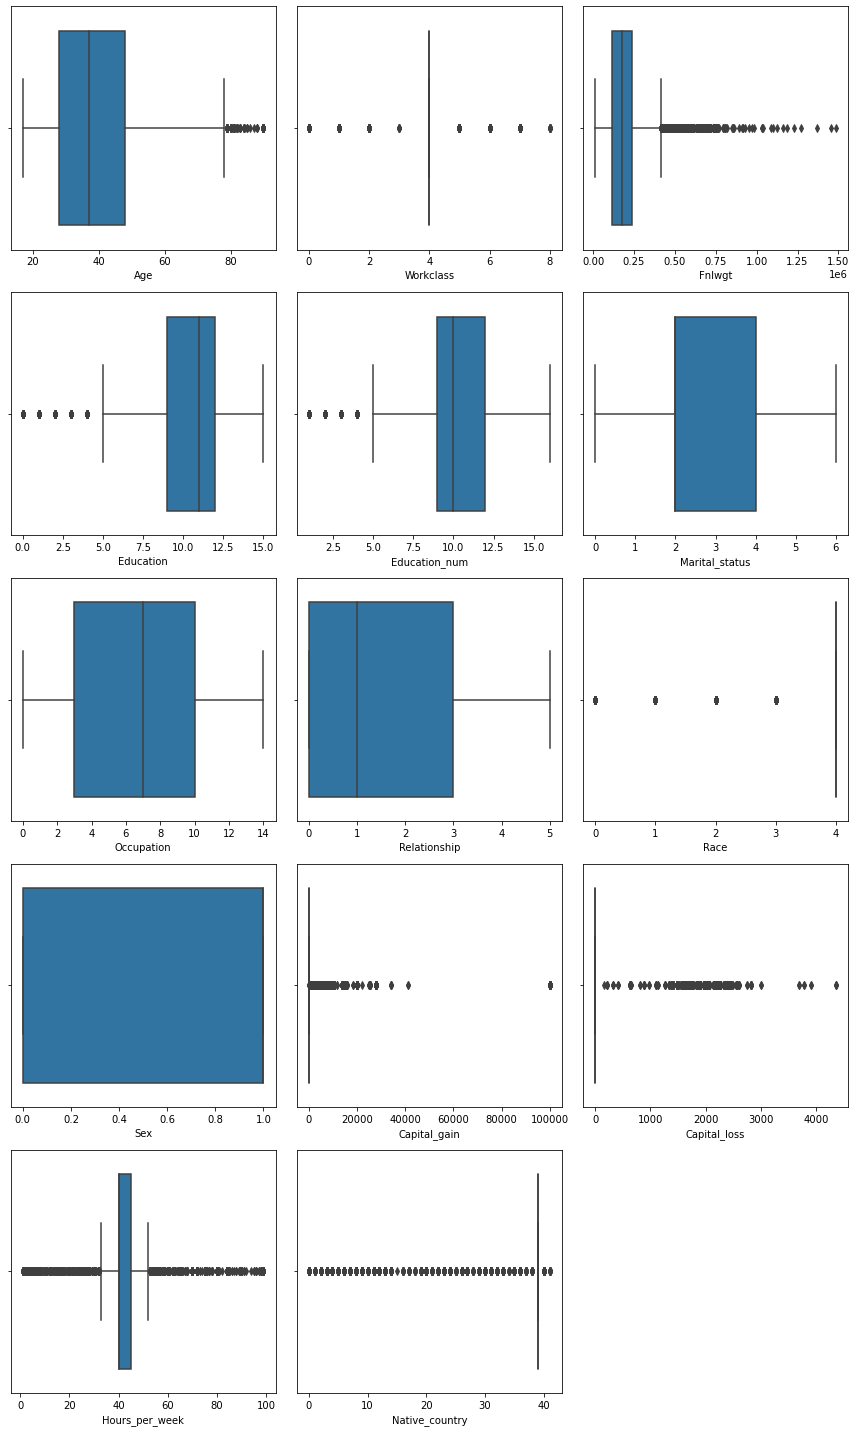

In [81]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Text(0.5, 1.0, 'Balanced data')

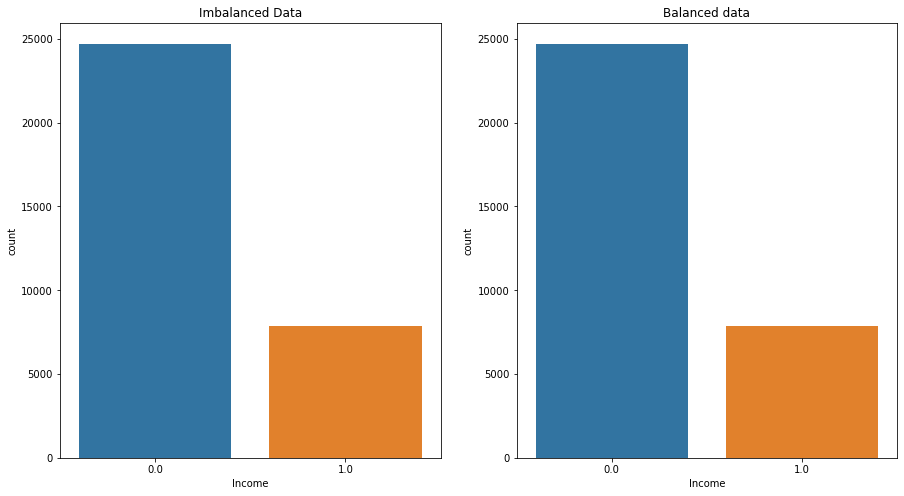

In [89]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df['Income'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(df['Income'])
plt.title("Balanced data")

In [91]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

Checking Skewness

In [92]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [129]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [107]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
}

In [111]:
param={
    'boosting_type': ['gbdt','dart','gross','rf'],
    'n_estimators':[100,500],
    'learning_rate':[0.1,0.01,0.001],
    'importance_type': ['split','gain'],
}

In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)
pred = lr.predict(X_test)

In [135]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

In [136]:
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 0.3697473518031601
The r2-score is: 0.2566633780734242


In [137]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor() #Instantiate the LogisticRegression object
DT.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of y_pred1 = DT.predict(X_test) #Predict


DecisionTreeRegressor()

In [138]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, pred))
r2_1 = r2_score(y_test, pred)

In [139]:
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 0.3697473518031601
The r2-score is: 0.2566633780734242


Model Saving

In [142]:
import pickle
filename = "Census Income_Prediction.pkl" 
pickle.dump(lr,open("Census Income_Prediction.pkl","wb"))

In [143]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

Conclusion - 

In this dataset I had predict the income of peoples. Where the given income is <50k or greater then 50k so I did EDA to understand the effect of features on target data.

There was lot of outliers so I remove outliers because I dont want to loose data and also build many model. 
At the end I saved the model